## Collecting (mostly) Non-Depressive data from Multiple Sources

Here we try to get some neutral as well as emotional dat from the competition (SemEval-2018 Task 1: Affect in Tweets (AIT-2018))
(https://competitions.codalab.org/competitions/17751#learn_the_details)

There are various subtasks and datasets. We decided to use the one with annotated Emotional Intensity, which is of Gold standard. This will allow us to be more specific about the type and range of emotions to include in our dataset, and more confident of the depth of its emotional content since it has been professionally annotated.

This notebook shows our analytical process in making the decision for inclusion. We try to find distinguishable patterns for each category in order to draw generalisaton based on their intensity score.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Load Data

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df_anger = pd.read_csv("/content/drive/MyDrive/Dataset1/depression_data/2018-EI-reg-En-anger-test-gold.txt", delimiter="\t")
df_fear = pd.read_csv("/content/drive/MyDrive/Dataset1/depression_data/2018-EI-reg-En-fear-test-gold.txt", delimiter="\t")
df_joy = pd.read_csv("/content/drive/MyDrive/Dataset1/depression_data/2018-EI-reg-En-joy-test-gold.txt", delimiter="\t")
df_sadness = pd.read_csv("/content/drive/MyDrive/Dataset1/depression_data/2018-EI-reg-En-sadness-test-gold.txt", delimiter="\t")

In [ ]:
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [ ]:
df_anger.head(3)

,ID,Tweet,Affect Dimension,Intensity Score
0,2018-En-02328,@PageShhh1 I know you mean well but I'm offended. Prick.,anger,0.734
1,2018-En-02617,"Let go of resentment, it will hold you back, do not worry about what could of been, what is to come is what matters.",anger,0.422
2,2018-En-01021,"No, I'm not 'depressed because of the weather,' I'm depressed because I have #depression #sicknotweak",anger,0.663


In [ ]:
df_fear.head(3)

,ID,Tweet,Affect Dimension,Intensity Score
0,2018-En-02626,"@EdmundPAdamus That's the horrific irony; while we 'cleanse' society of moral value, a new religion will rise up &amp; fill the gap - unhindered",fear,0.596
1,2018-En-00320,@TuckerCarlson @krauthammer @FoxNews They always need the drama and a fight to feel adaquate. Sad power is so insecure!!!,fear,0.533
2,2018-En-03973,@executivegoth I tried a free Alpha trial to watch #dread and I'm sold. Worth the subscription alone. You all are incredible!,fear,0.179


In [ ]:
df_joy.head(3)

,ID,Tweet,Affect Dimension,Intensity Score
0,2018-En-00290,People are truly #amazing. #inspiring day,joy,0.712
1,2018-En-03093,What are some good #funny #entertaining #interesting accounts I should follow ? My twitter is dry,joy,0.339
2,2018-En-00588,"@NoahWebHouse A review of my book faulted me for spending so much time on Webster's introductory front matter. But I had to, #brilliant!",joy,0.533


In [ ]:
df_sadness.head(3)

,ID,Tweet,Affect Dimension,Intensity Score
0,2018-En-03239,@TerraJole is a bully. plain and simple.,sadness,0.550
1,2018-En-02839,@LondonEconomic Sometimes our judiciary just leaves you breathless and speechless.,sadness,0.521
2,2018-En-01035,#pause You gotta luv March Madness. Mad?? More like #upset,sadness,0.525


In [ ]:
len(df_anger), len(df_fear), len(df_joy), len(df_sadness)

(17939, 17923, 18042, 17912)

In [ ]:
df_anger.columns

Index(['ID', 'Tweet', 'Affect Dimension', 'Intensity Score'], dtype='object')

Text(0, 0.5, 'frequency')

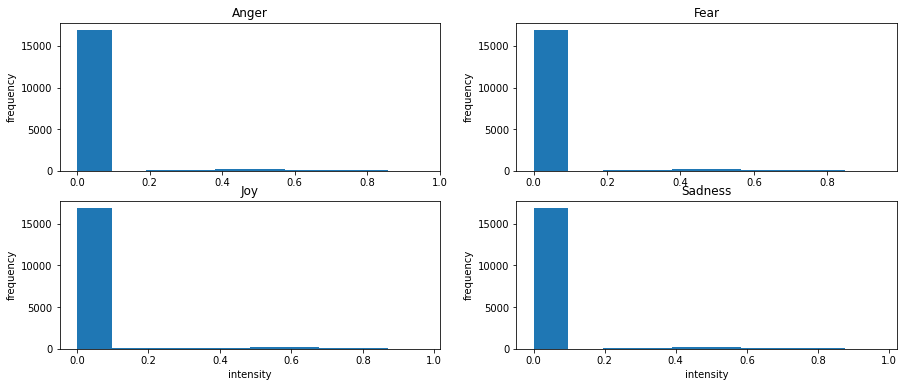

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(2, 2, 1)
plt.hist(df_anger["Intensity Score"], bins=10)
plt.title('Anger')
#plt.xlabel('intensity')
plt.ylabel('frequency')

plt.subplot(2, 2, 2)
plt.hist(df_fear["Intensity Score"], bins=10)
plt.title('Fear')
#plt.xlabel('intensity')
plt.ylabel('frequency')

plt.subplot(2, 2, 3)
plt.hist(df_joy["Intensity Score"], bins=10)
plt.title('Joy')
plt.xlabel('intensity')
plt.ylabel('frequency')

plt.subplot(2, 2, 4)
plt.hist(df_sadness["Intensity Score"], bins=10)
plt.title('Sadness')
plt.xlabel('intensity')
plt.ylabel('frequency')

In [ ]:
df_anger["Intensity Score"].value_counts().head()

0.000    16937
0.516    27   
0.500    26   
0.547    23   
0.469    22   
Name: Intensity Score, dtype: int64

**It is surprising to see that each dataset has such  high proportion of low intensity values**
 - Let´s separate the 0 intensities from the remainder values and see what the 0 intensity tweets look like

## 2. Examine entries with zero-level Intensity Scores

In [ ]:
df_anger0 = df_anger[df_anger["Intensity Score"] == 0]
df_fear0 = df_fear[df_fear["Intensity Score"] == 0]
df_joy0 = df_joy[df_joy["Intensity Score"] == 0]
df_sadness0 = df_sadness[df_sadness["Intensity Score"] == 0]

In [ ]:
len(df_anger0), len(df_fear0), len(df_joy0), len(df_sadness0)

(16937, 16937, 16937, 16937)

In [ ]:
df_anger0.head(8).Tweet, df_fear0.head(8).Tweet, df_joy0.head(8).Tweet, df_sadness0.head(8).Tweet, 

(1002    The situation makes Leroy feel annoyed.           
 1003    Leroy found himself in a grim situation.          
 1004    My girlfriend feels dissapointed.                 
 1005    The situation makes Shereen feel discouraged.     
 1006    Kristin is a lousy bartender.                     
 1007    What is the name of the largest Syrian lake?      
 1008    The situation makes Jamel feel scared.            
 1009    The conversation with an Argentinian was dreadful.
 Name: Tweet, dtype: object,
 986    The situation makes Leroy feel annoyed.           
 987    Leroy found himself in a grim situation.          
 988    My girlfriend feels dissapointed.                 
 989    The situation makes Shereen feel discouraged.     
 990    Kristin is a lousy bartender.                     
 991    What is the name of the largest Syrian lake?      
 992    The situation makes Jamel feel scared.            
 993    The conversation with an Argentinian was dreadful.
 Name: Tweet, dtype

**Comment:** The data is quite repetitive and does not really represent the user´s emotions. Perhaps it~s best if we exclude them from our training set

## 3. Examine entries with non-zero Intensity Scores

In [ ]:
df_anger1 = df_anger[df_anger["Intensity Score"] != 0]
df_fear1 = df_fear[df_fear["Intensity Score"] != 0]
df_joy1 = df_joy[df_joy["Intensity Score"] != 0]
df_sadness1 = df_sadness[df_sadness["Intensity Score"] != 0]

Text(0, 0.5, 'frequency')

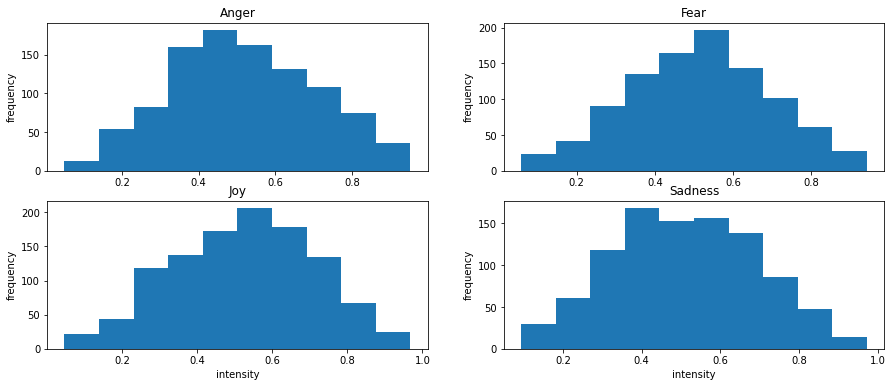

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(2, 2, 1)
plt.hist(df_anger1["Intensity Score"], bins=10)
plt.title('Anger')
#plt.xlabel('intensity')
plt.ylabel('frequency')

plt.subplot(2, 2, 2)
plt.hist(df_fear1["Intensity Score"], bins=10)
plt.title('Fear')
#plt.xlabel('intensity')
plt.ylabel('frequency')

plt.subplot(2, 2, 3)
plt.hist(df_joy1["Intensity Score"], bins=10)
plt.title('Joy')
plt.xlabel('intensity')
plt.ylabel('frequency')

plt.subplot(2, 2, 4)
plt.hist(df_sadness1["Intensity Score"], bins=10)
plt.title('Sadness')
plt.xlabel('intensity')
plt.ylabel('frequency')

In [ ]:
len(df_anger1), len(df_fear1), len(df_joy1), len(df_sadness1)

(1002, 986, 1105, 975)

## 4. Analysis of Individual Datasets

Let´s Try to look more closely at each category, especially at the lower and upper region, and decide if any data can be included into our training set.
We want to find generalisable patterns

**_A. Examine Anger_**

In [ ]:
df_anger1[df_anger1["Intensity Score"] < 0.3].head(20)

,ID,Tweet,Affect Dimension,Intensity Score
15,2018-En-03228,Dropping son off this morning then shopping with my girls for shoes wedding fun this afternoon. Your TL won't explode today. 😀,anger,0.266
23,2018-En-03865,My heart is so happy I want to explode. ❤️💥,anger,0.061
27,2018-En-03447,YOU MIGHT BE TRYING TO FILL THE VOID IN YOUR #HEART WITH ALL SORTS OF THINGS BUT THAT PLACE BELONGS TO JESUS CHRIST #music #worry #love #SMM,anger,0.210
33,2018-En-01879,"Dont sink to the level of those who insult you. Rather, rise to the level of those who inspire you. Deliver result, not insult",anger,0.258
36,2018-En-03548,So I'm pretty sure the @Indians are the MVP of the @AllStarGame #defense #pitching,anger,0.250
37,2018-En-00043,it takes sadness to know happiness\nabsence to value presence,anger,0.290
38,2018-En-01639,"To recreate my romantic memories, I'd just put a chip on my shoulder #masterchefau",anger,0.297
51,2018-En-01445,"@askGST_GoI without the process of boiling and drying, it cannot be used for coooking.",anger,0.266
59,2018-En-03110,#moist people aren't #offended by a little typo.,anger,0.297
61,2018-En-04114,Love implies anger. The man who is angered by nothing cares about nothing. ~Edward Abbey #love,anger,0.172


In [ ]:
len(df_anger1[df_anger1["Intensity Score"] < 0.3])

131

In [ ]:
df_anger1[df_anger1["Intensity Score"] > 0.8].head(20)

,ID,Tweet,Affect Dimension,Intensity Score
6,2018-En-04119,"Just know USA, all Canadians don't agree with what Khadr's settlement and his unwillingness to take responsibility for his actions. #outrage",anger,0.844
7,2018-En-01392,I hate getting woken up out my sleep 😡,anger,0.823
9,2018-En-01244,#UKVI why are you so difficult to access? And why on earth am I being charged exorbitant amounts to understand about my visa status?! #crap,anger,0.803
12,2018-En-02200,@CP_UK_Longleat money grabbing and RUBBISH customer service!!! Rapids shut but no reply to emails! #diabolical #CustomerService #crap,anger,0.914
13,2018-En-01391,I am so freaking annoyed that he constantly feels the need to be a time in my life where I'd be happy with just one monitor on my PC,anger,0.848
79,2018-En-00819,@AmazonHelp Why are you making it so hard to return a faulty item. It's not my fault that you sent out an item that doesn't work #fuming,anger,0.828
110,2018-En-00702,Remember when Julia thought she was pregnant with Michael's baby and I was so happy about it and then the storyline got dropped. #pissed,anger,0.889
112,2018-En-04293,See people now selling their #MayMac presss conference tickets at Wembley for £100 now when they were free. Scum cunts!!! 😡,anger,0.924
113,2018-En-00985,@mumsnet_madness I am furious that these passive smokers are huffing all my cig smoke without contributing to the cost of a packet #outrage,anger,0.833
148,2018-En-00919,"If I see one more Lakshmi EX enrage, I'm kill someone.",anger,0.922


**Conclusion** - A low value of anger can be included as non-depressive, judging by our random sample of text. A high level of anger is a little more tricky, so we will not include them for now

**_B. Examine Fear_**

In [ ]:
df_fear1[df_fear1["Intensity Score"] < 0.4].head(20)

,ID,Tweet,Affect Dimension,Intensity Score
2,2018-En-03973,@executivegoth I tried a free Alpha trial to watch #dread and I'm sold. Worth the subscription alone. You all are incredible!,fear,0.179
5,2018-En-02333,@cnn please get Sebstian Gorka off of my tv. The whole trump admin. needs to stop deflecting by talking about Hillary.,fear,0.328
11,2018-En-01344,My morning protein shake. Delicious way to assure I start my day the right way with 21 gms of whey protein. #protein #shake #morning,fear,0.210
12,2018-En-02726,"#AI #revolation, soon is possible!\n #fearless #good #goodness",fear,0.194
18,2018-En-02179,"'You dare threaten me, Thor, with so puny a weapon?'",fear,0.304
20,2018-En-01028,Why is an alarm clock going 'off' when it actually turns on? #alarm #alarmclock #ThursdayThoughts,fear,0.346
25,2018-En-01771,@shahidafridi37 at his best.... Great to watch u go big sir. #tremendous hits \nDts boom boom Afridi 😍,fear,0.133
27,2018-En-03019,"If your nail polish has hardened or is gummy, place the bottle in a pan of boiling water. The polish will be like new.",fear,0.222
29,2018-En-01166,"no offense to those who love k culture, u can love it all you want bbs!! 💖 but i just personally want to get to know my own country's-",fear,0.281
33,2018-En-03035,It bugs me that people concern themselves so much with what other people CHOOSE to do with their money 😂🙈,fear,0.250


In [ ]:
len(df_fear1[df_fear1["Intensity Score"] < 0.4])

265

In [ ]:
df_fear1[df_fear1["Intensity Score"] > 0.8].head(20)

,ID,Tweet,Affect Dimension,Intensity Score
28,2018-En-03125,"#TrumpRally : divisive, rude, incoherent. This man is truly insane. #terrifying #ridiculous I am an Arizonan Against Trump.",fear,0.839
39,2018-En-01914,things that terrify me: remembering my bf follows me on twitter,fear,0.817
43,2018-En-02003,3 hours of hell again. #anxiety. At this point I'm convinced I'll never get an on site job again or play keyboards live.,fear,0.895
56,2018-En-00526,One of those days. #Mentalhealth #Anxiety #agoraphobia #panic #depression #OCD,fear,0.907
97,2018-En-02972,@idktaehyng the possibilities terrify me,fear,0.911
101,2018-En-00694,I finally got my drivers permit #yes #readytodrive #nervous #scared,fear,0.857
135,2018-En-03209,Potentially going on holiday in 7 days.. can you get fit in that time? #panic 🤔,fear,0.911
144,2018-En-00105,On 1 side is the concern &amp; fear 4 our teens' safety &amp; happiness #thathorriblesuicidegame #terrifying #sosick (contd),fear,0.806
147,2018-En-03585,I panic when someone says: 'I need to talk to you'.,fear,0.847
149,2018-En-03244,Ashamed. How #EU citizens treated and made #insecure in #UK @AmberRuddHR @theresa_may It's on yr watch #fear#anger #distrust is flourishing,fear,0.850


**Conclusion** - A low-mod value of fear does not appear to be depressive. However, a higher level of fear is harder to judge, so will not be included this time

**_C. Examine Joy_**

In [ ]:
df_joy1[df_joy1["Intensity Score"] < 0.3].head(20)

,ID,Tweet,Affect Dimension,Intensity Score
3,2018-En-01532,#good to learning #wisdom &lt;&lt; reform (v): make in order to improve something &gt;&gt;,joy,0.281
9,2018-En-00053,"@thedramble Tried it once. Poured into the sink. Didn't bother to make tasting notes :-) Looks like cheap sake, tasted like it too...",joy,0.281
17,2018-En-04294,@SkyNewsAust Oh for four years these panelists were the lnp cheer squad hypocrites,joy,0.250
18,2018-En-00063,someone cheer me up,joy,0.219
32,2018-En-00663,persuade me into taking you out by using lively puns,joy,0.250
45,2018-En-01203,"Bitter afternoon,no sweetness at all #Lenovo",joy,0.141
47,2018-En-02499,@England_Netball @NetballSW Please vote for the South West nominees to give us a chance #humbled #southwestnetballfamily,joy,0.234
69,2018-En-00784,TY @PhilDieke: 'To drown out the God of #blessing is a powerful #political act. But the silencing cannot go on forever.' - @FCSCreationSpir,joy,0.242
70,2018-En-00586,"“When I get sad, I stop being sad and be awesome instead.” \n― Barney Stinson",joy,0.281
77,2018-En-00505,"@marcrileydj Looks like City fans are already blaming the ref for a shock defeat at Bournemouth, #amusing",joy,0.182


In [ ]:
df_joy1[df_joy1["Intensity Score"] > 0.5].head(20)

,ID,Tweet,Affect Dimension,Intensity Score
0,2018-En-00290,People are truly #amazing. #inspiring day,joy,0.712
2,2018-En-00588,"@NoahWebHouse A review of my book faulted me for spending so much time on Webster's introductory front matter. But I had to, #brilliant!",joy,0.533
4,2018-En-03258,"Really excited to see our team this year, and especially moving in the next 2-3 years when his guys start playing significant minutes.",joy,0.797
5,2018-En-03332,Be happy. Be confident. Be kind.\n\n #KissablesLoveSMShopmag\nAllOutDenimFor KISSMARC,joy,0.661
7,2018-En-04146,"You don't need money to have a great life, be eccentric, be creative, be joyful, be entertaining and all you want will come!",joy,0.578
8,2018-En-00231,@SatisfyingTaste @TheAnimalVines I used to make the peanut butter energy balls all the time. My famjam loved them! #recipes #yummy,joy,0.703
10,2018-En-03178,@RuthieeL &amp; @EamonnHolmes are total entertainment on @thismorning #brilliant #sofunny #myfaves,joy,0.586
11,2018-En-04149,"being an entrepreneur at 18 is a real blessing 🙏🏼 the flexibility, doing what you love, and being the one in charge is #great #blessed",joy,0.750
12,2018-En-01943,Vin Diesel is pretty cool. I have seen him in that movie Riddick and Pitch Black too. He must work out or something. #smiles,joy,0.532
13,2018-En-02634,@TeenMomOG2 @Javimarroquin9 @KailLowry He is so cute! Your #minime for sure! #blessing,joy,0.594


In [ ]:
len(df_joy1[df_joy1["Intensity Score"] > 0.5])

614

**Conclusion** - A low level of joy is inconclusive, but a mid-high level of joy is definitely non-depressive, so can be included in our dataset

**_D. Examine Sadness_**

In [ ]:
df_sadness1[df_sadness1["Intensity Score"] < 0.3].head(20)

,ID,Tweet,Affect Dimension,Intensity Score
6,2018-En-01054,"@VanBluesat @infrared_rock Among them, is Hawrelak Park and the stage they have there. A great venue. #livemusic #blues",sadness,0.180
7,2018-En-00210,Don't be discouraged.,sadness,0.283
8,2018-En-01771,@shahidafridi37 at his best.... Great to watch u go big sir. #tremendous hits \nDts boom boom Afridi 😍,sadness,0.200
11,2018-En-00294,"“We just have to hold on a bit longer, then we can sink this monster into the ocean.” #foodparty",sadness,0.269
16,2018-En-03502,Here is the message Cnbc is sending they Don't care that Melissa Lee has a horrible smile or a that Joe Kernan needs braces,sadness,0.283
18,2018-En-01775,"Do #you #said, people never cross the 10! #serious",sadness,0.220
28,2018-En-03813,Don't ever frown upon someone chasing a dream. Remember you were once chasing one too. HUMILITY ......,sadness,0.288
30,2018-En-00713,@SpnTentation Thank you! My first solo run! #excited #andnervous,sadness,0.289
31,2018-En-03307,@GutoAberconwy Your majority is 635 members of the public- believe me you have offended rather more than 635 voters!,sadness,0.276
32,2018-En-02823,A joyless faith is not one for which Jesus died. #thegospel #joy #Jesus #happiness,sadness,0.152


In [ ]:
len(df_sadness1[df_sadness1["Intensity Score"] < 0.3])

121

In [ ]:
df_sadness1[df_sadness1["Intensity Score"] > 0.8].head(20)

,ID,Tweet,Affect Dimension,Intensity Score
9,2018-En-00276,we mourn the death of our hopes today #james,sadness,0.870
22,2018-En-02064,@narendramodi Really it was very sad and shame!!!,sadness,0.862
42,2018-En-02565,My head is been hurting so much and I lost my appetite,sadness,0.860
43,2018-En-01021,"No, I'm not 'depressed because of the weather,' I'm depressed because I have #depression #sicknotweak",sadness,0.973
64,2018-En-03308,"Would love to stop crying sometime today, on my tenth cry 🙄 deep sadness on top of food poisoning do not mix. #miserable",sadness,0.857
95,2018-En-03669,#sadness #cry 💔 dad will never understand his 3rd child,sadness,0.833
125,2018-En-02545,"lonely is not being alone, it's the feeling that no one cares. #alone #depressed #anxiety",sadness,0.841
139,2018-En-01456,this year keeps getting more depressing and disappointing,sadness,0.909
143,2018-En-03844,no matter how many sad ghost man tears he's crying now! you are not entitled to forgiveness just because you're really sad now!!,sadness,0.804
166,2018-En-04017,Bout to cry 😭 I just wanna sleep I hate this job 😩,sadness,0.852


In [ ]:
len(df_sadness1[df_sadness1["Intensity Score"] > 0.8])

60

**Conclusion** - A low value of sadness can be considered as non-depressive, while a high level of sadnes can be marked as depressive

## 5. Compile the Final Dataset

Here are the criteria we will use to select the non-depreesive, and depressive tweets:

In [ ]:
# Non-depressive tweets
len(df_anger1[df_anger1["Intensity Score"] < 0.3]), len(df_fear1[df_fear1["Intensity Score"] < 0.4]), len(df_joy1[df_joy1["Intensity Score"] > 0.5]), len(df_sadness1[df_sadness1["Intensity Score"] < 0.3])

(131, 265, 614, 121)

In [ ]:
# depressive tweets
len(df_sadness1[df_sadness1["Intensity Score"] > 0.8])

60

In [ ]:
df_non_depress = pd.concat([df_anger1[df_anger1["Intensity Score"] < 0.3], df_fear1[df_fear1["Intensity Score"] < 0.4], df_joy1[df_joy1["Intensity Score"] > 0.5], df_sadness1[df_sadness1["Intensity Score"] < 0.3]])
len(df_non_depress)

1131

In [ ]:
df_depress = df_sadness1[df_sadness1["Intensity Score"] > 0.8]
len(df_depress)

60

In [ ]:
df_non_depress["target"] = 0
df_depress["target"] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_non_depress.head()

,ID,Tweet,Affect Dimension,Intensity Score,target
15,2018-En-03228,Dropping son off this morning then shopping with my girls for shoes wedding fun this afternoon. Your TL won't explode today. 😀,anger,0.266,0
23,2018-En-03865,My heart is so happy I want to explode. ❤️💥,anger,0.061,0
27,2018-En-03447,YOU MIGHT BE TRYING TO FILL THE VOID IN YOUR #HEART WITH ALL SORTS OF THINGS BUT THAT PLACE BELONGS TO JESUS CHRIST #music #worry #love #SMM,anger,0.210,0
33,2018-En-01879,"Dont sink to the level of those who insult you. Rather, rise to the level of those who inspire you. Deliver result, not insult",anger,0.258,0
36,2018-En-03548,So I'm pretty sure the @Indians are the MVP of the @AllStarGame #defense #pitching,anger,0.250,0


In [ ]:
df_depress.head()

,ID,Tweet,Affect Dimension,Intensity Score,target
9,2018-En-00276,we mourn the death of our hopes today #james,sadness,0.870,1
22,2018-En-02064,@narendramodi Really it was very sad and shame!!!,sadness,0.862,1
42,2018-En-02565,My head is been hurting so much and I lost my appetite,sadness,0.860,1
43,2018-En-01021,"No, I'm not 'depressed because of the weather,' I'm depressed because I have #depression #sicknotweak",sadness,0.973,1
64,2018-En-03308,"Would love to stop crying sometime today, on my tenth cry 🙄 deep sadness on top of food poisoning do not mix. #miserable",sadness,0.857,1


In [ ]:
df_final = pd.concat([df_non_depress, df_depress])

In [ ]:
df_final = df_final.sample(frac=1).reset_index(drop=True)
df_final.head(20)

,ID,Tweet,Affect Dimension,Intensity Score,target
0,2018-En-03969,@Jesus_Luvs_Us Hello Jillian &amp; JC - a nice wisg from Betty for blessings to us all - I wish you the same - have a wonderful Tuesday! 😀,joy,0.734,0
1,2018-En-03026,A shout out to all fellow #12Step-pers. You got this! #recovery #clean,sadness,0.233,0
2,2018-En-03336,"A pineapple is neither an apple or a pine. It is, in fact, a large berry.",sadness,0.194,0
3,2018-En-02249,@Ithika Loving it! 😂,joy,0.813,0
4,2018-En-01445,"@askGST_GoI without the process of boiling and drying, it cannot be used for coooking.",anger,0.266,0
5,2018-En-01941,I start my lpn program this October 😌 #blessed,joy,0.641,0
6,2018-En-02620,@MegZ1498 Before 10am town going clean up. Doh fret.,anger,0.281,0
7,2018-En-02652,Happy Birthday @RyanRolison24! Have an AWESOME day! We're keeping up with you on the Cape and you're doing great!,joy,0.797,0
8,2018-En-01742,Ain't nothing like a good leg workout to start of the day 🤘,joy,0.567,0
9,2018-En-02078,@TommySandhu @bbcasiannetwork tommy you r phenomenal smashed #ajjdin on the mixes #hilarious and #awesome 😜😂😂👍🏻,joy,0.578,0


In [ ]:
df_final.to_csv("general_tweets.csv")

## Conclusion

**The resulting dataset will be combined with the depressive dataset we have compiled, to be used in training and testing our model for depression**